In [26]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [27]:
# File to Load
city_csv = "data/city_data.csv"
ride_csv = "data/ride_data.csv"

# Read the City and Ride Data
city_data =  pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

In [28]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [29]:
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [30]:
# Combining both datasets
merged_data = pd.merge(ride_data, city_data, how='left', on='city')
merged_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [31]:
# Data contains duplicate city entries
entries = merged_data.iloc[:, 0].value_counts()
entries.head()

West Angela        39
South Karenland    38
North Jason        35
Liumouth           33
Port Frank         33
Name: city, dtype: int64

In [32]:
# Analyzing data types in each column
merged_data.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [33]:
# Checking for missing values
merged_data.isna().sum()

city            0
date            0
fare            0
ride_id         0
driver_count    0
type            0
dtype: int64

In [34]:
# Grouping taxi data by city type and city name
grouped_city_data = merged_data.groupby(['type', 'city'])

In [35]:
#Calculating the total number of drivers in each city
tot_city_drivers = grouped_city_data.driver_count.unique()
tot_city_drivers = np.concatenate(tot_city_drivers, axis=0 )
tot_city_drivers

array([ 7,  7,  4,  1,  4,  2,  6,  2,  1,  8,  1,  6,  9,  7,  1,  7,  1,
        4, 11, 22, 10, 23, 23,  7, 22, 20,  5,  2, 25,  3, 22,  4, 23, 23,
        4, 14, 19, 20, 17, 20, 19, 11,  1,  7,  7, 20, 10,  1, 21, 20, 16,
       12,  4,  2, 12, 26, 52, 41, 49, 65, 37, 61, 37, 36, 64, 27, 39, 39,
       22,  5, 19,  5, 58, 17, 69, 23, 25, 50, 33, 44, 44, 18, 33,  6, 19,
       22, 59, 67,  7, 23,  3, 57, 11, 67, 38, 47, 12, 34, 25, 64, 21, 11,
       46,  4, 10, 72, 38, 45, 48, 70, 32, 25, 57, 28, 45, 25, 39, 73, 59,
       46])

In [36]:
# Calculating the total fares for each city
tot_city_fares = grouped_city_data.fare.sum()
tot_city_fares.head()

type   city          
Rural  Bradshawfurt      400.64
       Garzaport          72.37
       Harringtonfort    200.82
       Jessicaport       216.08
       Lake Jamie        206.15
Name: fare, dtype: float64

In [37]:
# Calculating the total number of rides for each city
tot_city_rides = grouped_city_data.ride_id.count()
tot_city_rides.head()

type   city          
Rural  Bradshawfurt      10
       Garzaport          3
       Harringtonfort     6
       Jessicaport        6
       Lake Jamie         6
Name: ride_id, dtype: int64

In [38]:
# Calculating the average fare for each city
avg_city_fare = round(tot_city_fares / tot_city_rides, 2)
avg_city_fare.head()

type   city          
Rural  Bradshawfurt      40.06
       Garzaport         24.12
       Harringtonfort    33.47
       Jessicaport       36.01
       Lake Jamie        34.36
dtype: float64

In [39]:
final_city_data = {'Total Number of Drivers': tot_city_drivers,
                   'Total Number of Ride': tot_city_rides,
                   'Total Fares ($)': tot_city_fares, 
                   'Average Fare ($)': avg_city_fare
                  }

In [40]:
city_data_df = pd.DataFrame(final_city_data)
city_data_df.head()

Total Number of Drivers  Total Number of Ride  \
type  city                                                            
Rural Bradshawfurt                          7                    10   
      Garzaport                             7                     3   
      Harringtonfort                        4                     6   
      Jessicaport                           1                     6   
      Lake Jamie                            4                     6   

                      Total Fares ($)  Average Fare ($)  
type  city                                               
Rural Bradshawfurt             400.64             40.06  
      Garzaport                 72.37             24.12  
      Harringtonfort           200.82             33.47  
      Jessicaport              216.08             36.01  
      Lake Jamie               206.15             34.36

In [41]:
alt_city_data = city_data_df.reset_index()

In [42]:
# Calculating the total number of drivers in each city type
rural_drivers = np.array(alt_city_data.loc[alt_city_data['type'] == 'Rural']['Total Number of Drivers'])
urban_drivers = np.array(alt_city_data.loc[alt_city_data['type'] == 'Urban']['Total Number of Drivers'])
suburban_drivers = np.array(alt_city_data.loc[alt_city_data['type'] == 'Suburban']['Total Number of Drivers'])

# Calculating the average fare in each city type
rural_fares = np.array(alt_city_data.loc[alt_city_data['type'] == 'Rural']['Average Fare ($)'])
urban_fares = np.array(alt_city_data.loc[alt_city_data['type'] == 'Urban']['Average Fare ($)'])
suburban_fares = np.array(alt_city_data.loc[alt_city_data['type'] == 'Suburban']['Average Fare ($)'])

# Calculating the total number of rides in each city type
rural_rides = np.array(alt_city_data.loc[alt_city_data['type'] == 'Rural']['Total Number of Ride'])
urban_rides = np.array(alt_city_data.loc[alt_city_data['type'] == 'Urban']['Total Number of Ride'])
suburban_rides = np.array(alt_city_data.loc[alt_city_data['type'] == 'Suburban']['Total Number of Ride'])

## Bubble Plot of Ride Sharing Data

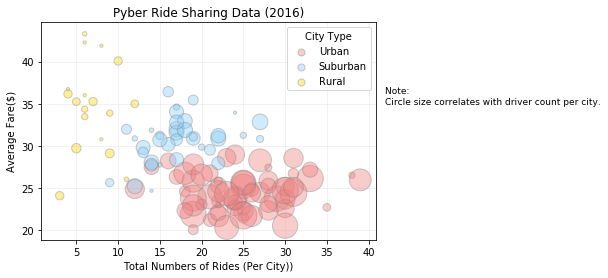

In [43]:
plt.figure()

# Setting the x, y and z axes for the graph and plotting for each city type
plt.scatter(urban_rides, urban_fares, s=urban_drivers*10, 
            marker ='o', facecolors ="lightcoral", edgecolors='grey',alpha = 0.4, label="Urban")

plt.scatter(suburban_rides, suburban_fares, s=suburban_drivers*10, 
            marker ='o', facecolors ="lightskyblue", edgecolors='grey',alpha = 0.4, label="Suburban")

plt.scatter(rural_rides, rural_fares, s=rural_drivers*10, 
            marker ='o', facecolors ="gold", edgecolors='grey',alpha = 0.4, label="Rural")


# Adding chart title
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Numbers of Rides (Per City))")
plt.ylabel("Average Fare($)")

# Showing grid lines
plt.grid(True, alpha = 0.2)

# Cobfiguring legend
lgnd = plt.legend(title='City Type', loc="best", markerscale=2, scatterpoints=1, fontsize=10)
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 9)

lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

# Saving figure
plt.savefig("figures/city_type_data.png", bbox_inches="tight")

plt.show()


---

## Total Fares by City Type

In [44]:
# Calculating the number of fares by city type
rural_tot_fares = np.array(alt_city_data.loc[alt_city_data['type'] == 'Rural']['Total Fares ($)']).sum()
urban_tot_fares = np.array(alt_city_data.loc[alt_city_data['type'] == 'Urban']['Total Fares ($)']).sum()
suburban_tot_fares = np.array(alt_city_data.loc[alt_city_data['type'] == 'Suburban']['Total Fares ($)']).sum()
tot_fares = alt_city_data['Total Fares ($)'].sum()

perc_rural_fares = round((rural_tot_fares / tot_fares) * 100, 1)
perc_urban_fares = round((urban_tot_fares / tot_fares) * 100, 1)
perc_suburban_fares = round((suburban_tot_fares / tot_fares) * 100, 1)

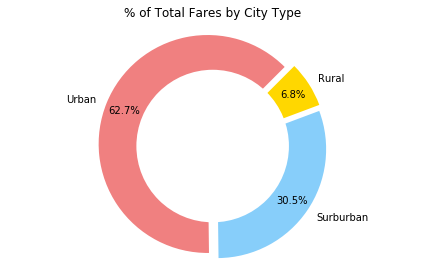

In [45]:
# Building a pie chart

labels = ['Urban', 'Surburban', 'Rural']
sizes = [perc_urban_fares, perc_suburban_fares, perc_rural_fares]
plt.title("% of Total Fares by City Type")

#colors
colors = ['lightcoral','lightskyblue','gold']

#explsion
explode = (0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=45, pctdistance=0.83, explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()

plt.savefig("figures/perc_total_fare.png", bbox_inches="tight")

plt.show()

## Total Rides by City Type

In [46]:
# Calculating the number of rides by city type
rural_tot_rides = np.array(alt_city_data.loc[alt_city_data['type'] == 'Rural']['Total Number of Ride']).sum()
urban_tot_rides = np.array(alt_city_data.loc[alt_city_data['type'] == 'Urban']['Total Number of Ride']).sum()
suburban_tot_rides = np.array(alt_city_data.loc[alt_city_data['type'] == 'Suburban']['Total Number of Ride']).sum()
tot_rides = alt_city_data['Total Number of Ride'].sum()

perc_rural_rides = round((rural_tot_rides / tot_rides) * 100, 1)
perc_urban_rides = round((urban_tot_rides / tot_rides) * 100, 1)
perc_suburban_rides = round((suburban_tot_rides / tot_rides) * 100, 1)

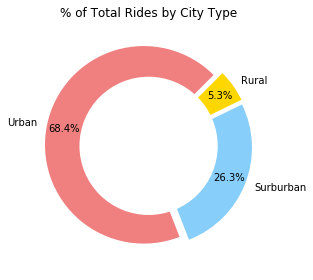

In [47]:
# Building a pie chart

labels = ['Urban', 'Surburban', 'Rural']
sizes = [perc_urban_rides, perc_suburban_rides, perc_rural_rides]
plt.title("% of Total Rides by City Type")

#colors
colors = ['lightcoral','lightskyblue','gold']

#explsion
explode = (0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=45, pctdistance=0.83, explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
#plt.axis('equal')  
plt.tight_layout()

plt.savefig("figures/perc_total_rides.png", bbox_inches="tight")

plt.show()

## Total Drivers by City Type

In [48]:
# Calculate Driver Percents
# Calculating the number of rides by city type
rural_tot_drivers = np.array(alt_city_data.loc[alt_city_data['type'] == 'Rural']['Total Number of Drivers']).sum()
urban_tot_drivers = np.array(alt_city_data.loc[alt_city_data['type'] == 'Urban']['Total Number of Drivers']).sum()
suburban_tot_drivers = np.array(alt_city_data.loc[alt_city_data['type'] == 'Suburban']['Total Number of Drivers']).sum()
tot_drivers = alt_city_data['Total Number of Drivers'].sum()

perc_rural_drivers = round((rural_tot_drivers / tot_drivers) * 100, 1)
perc_urban_drivers = round((urban_tot_drivers / tot_drivers) * 100, 1)
perc_suburban_drivers = round((suburban_tot_drivers / tot_drivers) * 100, 1)
# Build Pie Charts

# Save Figure


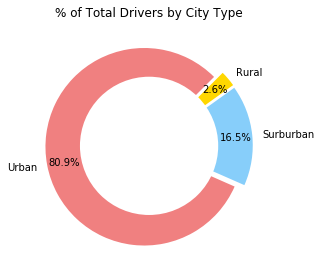

In [49]:
# Building a pie chart

labels = ['Urban', 'Surburban', 'Rural']
sizes = [perc_urban_drivers, perc_suburban_drivers, perc_rural_drivers]
plt.title("% of Total Drivers by City Type")

#colors
colors = ['lightcoral','lightskyblue','gold']

#explsion
explode = (0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=45, pctdistance=0.83, explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
#plt.axis('equal')  
plt.tight_layout()

plt.savefig("figures/perc_total_drivers.png", bbox_inches="tight")

plt.show()